In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score

In [22]:
X_test = pd.read_csv('data_source/X_test.csv')
y_test = pd.read_csv('data_source/y_test.csv')

X_train = pd.read_csv('data_source/X_train.csv')
y_train = pd.read_csv('data_source/y_train.csv')

In [20]:
X_test.nunique(axis=0)

Source Port             12052
Destination Port         1570
NAT Source Port         10302
NAT Destination Port     1103
Bytes                    4310
Bytes Sent               3167
Bytes Received           3671
Packets                   521
Elapsed Time (sec)        513
pkts_sent                 372
pkts_received             433
dtype: int64

1. Variance Threshold 

Reject because all features have high variance

In [7]:
# import ordinal encoder from sklearn
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
  
# Transform the data
X_train[["Source Port","Destination Port","NAT Source Port","NAT Destination Port"]] = ord_enc.fit_transform(X_train[["Source Port","Destination Port","NAT Source Port","NAT Destination Port"]])

In [13]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0) #Removing both constant and quasi-constant
var_thr.fit(X_train)

var_thr.get_support()

# True is hight variance
# False is low variance

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

2. Mean Absolute Difference (MAD)

higher the MAD, the higher the discriminatory power

<BarContainer object of 11 artists>

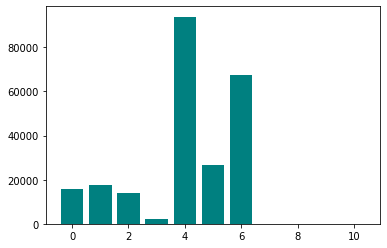

In [21]:
# Calculate MAD
mean_abs_diff = np.sum(np.abs(X_train - np.mean(X_train, axis=0 )), axis=0) / X_train.shape[0]

# Plot the bar chart
plt.bar(np.arange(X_train.shape[1]), mean_abs_diff, color='teal')

3. Dispersion Ratio

<BarContainer object of 7 artists>

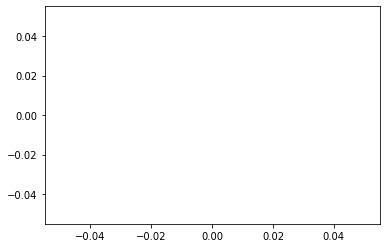

In [39]:
X_train = X_train.loc[:,['Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']] + 1 #To avoid 0 for denominator

# Arithmetic Mean
am = np.mean(X_train, axis=0)

# Geometric Mean
gm = np.power( np.prod(X_train, axis=0),1/X_train.shape[0])

# Ratio of arithmetic mean and geomatric mean
disp_ratio = am/gm

# Plot the bar chart
plt.bar(np.arange(X_train.shape[1]), disp_ratio, color = 'teal')


4. Forward Feature Selection

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values()
feat_importances

C:\Users\User\AppData\Local\Temp\ipykernel_1576\3719736565.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


Bytes Received          0.003501
pkts_sent               0.004047
pkts_received           0.004266
Packets                 0.005268
Elapsed Time (sec)      0.020149
Bytes                   0.068274
Bytes Sent              0.068414
NAT Destination Port    0.072975
Source Port             0.163526
NAT Source Port         0.236169
Destination Port        0.353413
dtype: float64

In [62]:
feat_importances = feat_importances.sort_values()
feat_importances

Bytes Received          0.003326
pkts_received           0.004605
pkts_sent               0.005881
Packets                 0.006391
Elapsed Time (sec)      0.020769
Bytes Sent              0.069000
Bytes                   0.069273
NAT Destination Port    0.075657
Source Port             0.154009
NAT Source Port         0.235845
Destination Port        0.355243
dtype: float64

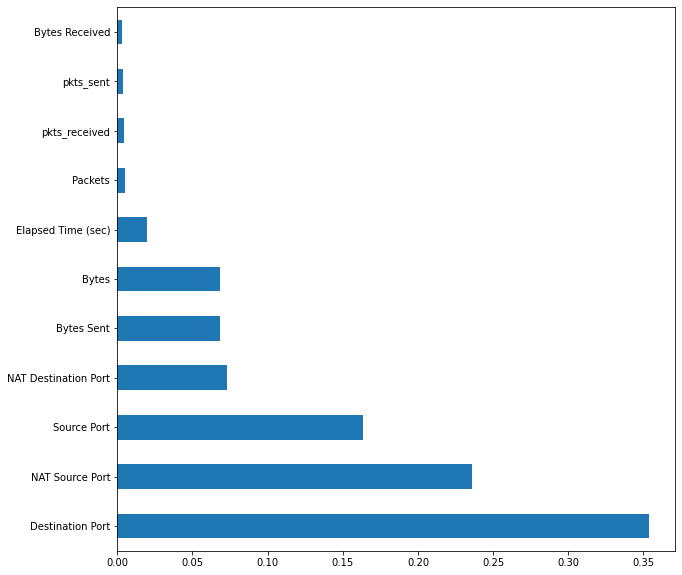

In [64]:
plt.figure(figsize=(10,10))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()